<a href="https://colab.research.google.com/github/Frinhani/LearningMachineLearning/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

#Carregando Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

#Análise Exploratória

In [3]:
print('Quantidade de imagens para treino: ',len(imagens_treino))
print('Quantidade de imagens para teste: ',len(imagens_teste))
print(f'As informações de cada uma das {imagens_treino.shape[0]} imagens de treino, estão distribuídas em {imagens_treino.shape[1]} linhas e {imagens_treino.shape[2]} colunas')
print(f'As informações de cada uma das {imagens_teste.shape[0]} imagens de teste, estão distribuídas em {imagens_teste.shape[1]} linhas e {imagens_teste.shape[2]} colunas')
print('Quantidade de linhas de identificação para treino: ',len(identificacoes_treino))
print('Quantidade de linhas de identificação para teste: ',len(identificacoes_teste))
print('Menor número usado para identificação no treino: ',identificacoes_treino.min())
print('Maior número usado para identificação no treino: ',identificacoes_treino.max())

Quantidade de imagens para treino:  60000
Quantidade de imagens para teste:  10000
As informações de cada uma das 60000 imagens de treino, estão distribuídas em 28 linhas e 28 colunas
As informações de cada uma das 10000 imagens de teste, estão distribuídas em 28 linhas e 28 colunas
Quantidade de linhas de identificação para treino:  60000
Quantidade de linhas de identificação para teste:  10000
Menor número usado para identificação no treino:  0
Maior número usado para identificação no treino:  9


#Exibição dos Dados

Text(0.5, 1.0, '9')

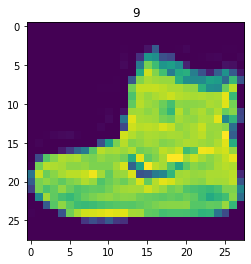

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

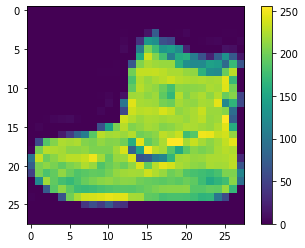

In [5]:
total_de_classificacoes = 10
nomes_de_classificacao = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                          'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# for imagem in range(10):
#   plt.subplot(2,5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacao[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

#Normalizando as imagens

In [6]:
#normalização
imagens_treino = imagens_treino/float(255)

#Criando, Compilando, Treinando e Normalizando o Modelo

In [7]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5265 - accuracy: 0.8124 - val_loss: 0.4159 - val_accuracy: 0.8477
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8549 - val_loss: 0.3762 - val_accuracy: 0.8663
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8666 - val_loss: 0.3713 - val_accuracy: 0.8690
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3408 - accuracy: 0.8743 - val_loss: 0.3414 - val_accuracy: 0.8767
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8802 - val_loss: 0.3490 - val_accuracy: 0.8735


#Salvando e Carregando o Modelo Treinado

In [8]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

#Visualizando as Acurácias de Treino e Validação por época

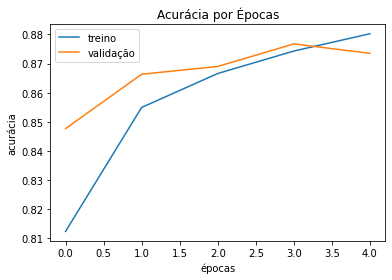

In [9]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

#Visualizando as Perdas de Treino e Validação por época

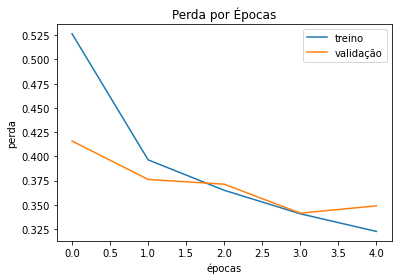

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

#Testando o Modelo e o Modelo Salvo

In [11]:
testes = modelo.predict(imagens_teste)
print('Resultado teste: ', np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

Resultado teste:  2
Número da imagem de teste:  2


In [12]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])


resultado teste modelo salvo:  2
Número da imagem de teste:  2


#Avaliando o Modelo e o Modelo Salvo

In [13]:
perda_teste, acuracia_teste  = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 46.2437 - accuracy: 0.8675
Perda do teste  46.24371337890625
Acurácia do teste:  0.8675000071525574


In [14]:
perda_modelo_salvo_teste, acuracia_modelo_salvo_teste  = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste no Modelo Salvo ', perda_modelo_salvo_teste)
print('Acurácia do teste no Modelo Salvo: ', acuracia_modelo_salvo_teste)

313/313 [==============================] - 1s 2ms/step - loss: 46.2437 - accuracy: 0.8675
Perda do teste no Modelo Salvo  46.24371337890625
Acurácia do teste no Modelo Salvo:  0.8675000071525574
